In [3]:
#Importando librerias
import os
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy import ndimage
import earthpy as et
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 8, 6

In [12]:
os.chdir(os.path.join(et.io.HOME,'earth-analytics'))
descargas_py = pd.read_csv(os.path.join(et.io.HOME,'earth-analytics', 'data','earthpy-downloads','paraguay.csv'))
coordinates = gpd.points_from_xy(descargas_py.Longitude, descargas_py.Latitude)
descargas_gpd = gpd.GeoDataFrame(data = descargas_py, geometry = coordinates)
descargas_gpd

,LightningTime,Latitude,Longitude,Height,FlashType,Amplitude,geometry
0,2022-06-01T11:39:46.020149513,-25.06598,-55.48972,0,0,13177,POINT (-55.48972 -25.06598)
1,2022-06-01T11:39:47.434044794,-25.63992,-55.01918,7134,1,37518,POINT (-55.01918 -25.63992)
2,2022-06-01T11:39:49.433415065,-24.87441,-55.40839,0,0,-34234,POINT (-55.40839 -24.87441)
3,2022-06-01T11:39:50.661510893,-25.89717,-55.13200,4576,1,11893,POINT (-55.13200 -25.89717)
4,2022-06-01T11:39:56.733833993,-26.41831,-53.60144,12384,1,-3608,POINT (-53.60144 -26.41831)
...,...,...,...,...,...,...,...
348,2022-06-01T11:39:41.486678448,-26.12104,-53.56278,16056,1,6413,POINT (-53.56278 -26.12104)
349,2022-06-01T11:39:41.956948994,-24.80540,-52.70646,15723,1,12861,POINT (-52.70646 -24.80540)
350,2022-06-01T11:39:42.375866763,-24.47835,-52.88748,0,0,-31497,POINT (-52.88748 -24.47835)
351,2022-06-01T11:39:42.592462292,-25.70044,-53.42996,0,0,-111198,POINT (-53.42996 -25.70044)


<AxesSubplot:>

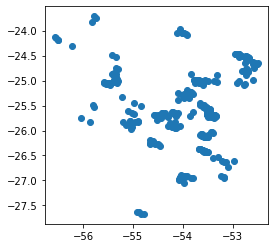

In [13]:
descargas_gpd.plot()

In [16]:
#Definiendo funcion heatmap
def heatmap(d, bins = (100,100), smoothing = 1.3,cmap ='jet'):
    def getx(pt):
        return pt.coords[0][0]
    def gety(pt):
        return pt.coords[0][1]
    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges, = np.histogram2d(y, x, bins = bins)
    extent =[yedges[0],yedges[-1], xedges[-1], xedges[0]]
    
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing,
                                                mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

C:\Users\AgOvi\AppData\Local\Temp\ipykernel_16648\2347655344.py:12: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
C:\Users\AgOvi\AppData\Local\Temp\ipykernel_16648\2347655344.py:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing,


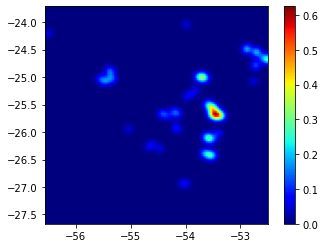

In [21]:
heatmap(descargas_gpd, bins=100, smoothing=1.5)